In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [19]:
import warnings

In [20]:
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_csv(R"C:\Users\ny691\Downloads\Classification\Classification\diabetes.csv")

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
def Auto_pro(df):
    print(df)
    print("CHECKING NAN")
    print(df.isna().sum())
    print(df.dtypes)
    ilist=df.columns[:len(df.columns)-1]
    for i in ilist:
        print(df[i].isna().sum())
        if df[i].isna().sum()!=0:
            print("Nans in this column:",i)
            if df[i].dtype=="object":
                df[i]=df[i].fillna(df[i].mode())
            else:
                df[i]=df[i].fillna(df[i].mean())
        else:
            print("No Nan in this column:",i)
    df.dropna(inplace=True)
    print("--------------------------------------------------")
    print("CHECKING ERROR DETECTION")
    sns.boxplot(data=df)
    plt.show()
    from scipy.stats import norm
    for e in ilist:
        if df[e].dtypes!="object":
            plt.subplot(1,2,1)
            plt.hist(df[e],ec="y",bins=20)
            plt.title(e+" hist")
            plt.subplot(1,2,2)
            sns.distplot(df[e],fit=norm)
            plt.title(e+" distplot")
            plt.show()
            if df[e].skew().round()==0:
                print("It is a norma distribution=>Mean std method")
                print(df[e].describe())
                m=df[e].mean()
                s=df[e].std()
                lower=m-(3*s)
                upper=m+(3*s)
                print("lower limit :",lower)
                print("upper limit :",upper)
                df[e]=df[e].map(lambda Z : m if Z<lower else m if Z>upper else Z)
                print("Rechecking the errors after caping")
                print(df[(df[e]<lower) | (df[e]>upper)])
            else:
                print("It is a skew distribution => IQR method")
                q1=df[e].quantile(0.25)
                q3=df[e].quantile(0.75)
                IQR=q3-q1
                lower1=q1-(1.5*IQR)
                upper1=q3+(1.5*IQR)
                print("lower limit :",lower1)
                print("upper limit :",upper1)
                df[e]=df[e].map(lambda A : df[e].mean() if A<lower1 else df[e].mean() if A>upper1 else A )
                print("Rechecking the errors after caping")
                print(df[(df[e]<lower1) | (df[e]>upper1)])
        elif df[e].dtypes=="Object":
            print(df[e].value_counts().plot(kind="bar"))
    print(df)        
    print("---------------------------------------------------------")        
    depen=df.columns[-1]
    if df[depen].dtypes!="object":
        d=input("dependent column Error effected  yes or no:")
        d=d.capitalize()
        if d=="Yes":
            print("Trimming the Dependent column ")
            if df[depen].skew().round()==0:
                print("normal distribution")
                m=df[depen].mean()
                s=df[depen].std()
                lower2=m-(3*s)
                upper2=m+(3*s)
                df=df[(df[depen]>=lower2) & (df[depen]<=upper2)]
                print(df)
            else:
                print("skew distribution")
                q1=df[depen].quantile(0.25)
                q3=df[depen].quantile(0.75)
                Iqr=q3-q1
                lower3=q1-(1.5*Iqr)
                upper3=q3+(1.5*Iqr)
                df=df[(df[depen]>=lower3) & (df[depen]<=upper3)]
                print(df)
        else:
            print("Dependent column not Error effected")
    print(df)         
    print("-------------------------------------------------------------------")        
    print("ENCODING")
    o=input("Independent columns have ordinal categorical data yes or no:")
    o=o.capitalize()
    if o=="Yes":
        print("Use the comma in between muliple columns entered ")
        olist=input("enter the Ordinal data columns:").split(",")
        for r in olist:
            from sklearn.preprocessing import OrdinalEncoder
            orde=OrdinalEncoder()
            orde.fit(df[[r]])
            orde.transform(df[[r]])
            df[r]=orde.transform(df[[r]])
    else:
        print("no Ordinal data")
        
    if df[depen].dtypes=="object":
        from sklearn.preprocessing import LabelEncoder
        lab=LabelEncoder()
        lab.fit(df[depen])
        lab.transform(df[depen])
        depen=depen+"_Encoded"
        df[depen]=lab.transform(df[depen])
    else:
        print("Dependent column have numerical data")
    df=pd.get_dummies(df,drop_first=True)
    print(df)
    print("------------------------------------------")
    print("DATA SEPARATION")
    x=df.drop(depen,axis=1)
    y=df[depen]
    print("Independent data shape:",x.shape)
    print("Dependent data shape:",y.shape)
    print("---------------------------------------------------------------")
    if depen[-8:]=="_Encoded":
        print("Imbalance Checking")
        y.value_counts().plot(kind="bar")
        imb=input("Dependent column is imbalance => yes or no:")
        imb=imb.capitalize()
        if imb=="Yes":
            from imblearn.over_sampling import SMOTE
            smt=SMOTE()
            x,y=smt.fit_resample(x,y)
    print("IT IS A CLASSIFICATION PROBLEM")
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
    dtrc=DecisionTreeClassifier()
    svc=SVC()
    knc=KNeighborsClassifier()
    lgr=LogisticRegression()
    adc=AdaBoostClassifier()
    gdc=GradientBoostingClassifier()
    rfc=RandomForestClassifier()
    mclist=[dtrc,svc,knc,lgr,adc,gdc,rfc]
    for mc in mclist:
            cl=[]
            for n in range(51):
                x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=n)
                mc.fit(x_train,y_train)
                s=mc.score(x_test,y_test)
                cl.append(s)
            s3=cl.index(max(cl))
            print("Random state => ",s3)
            print(mc,"=>",max(cl))

    
                
            
                
            
        

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

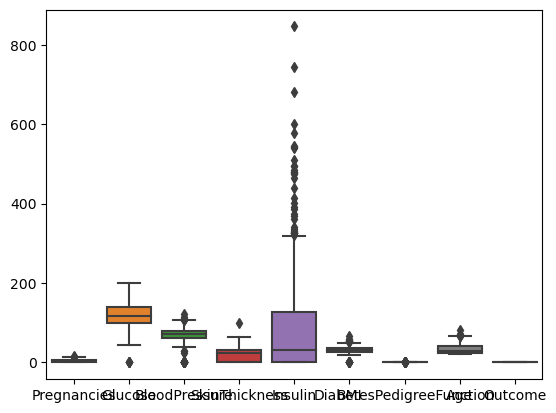

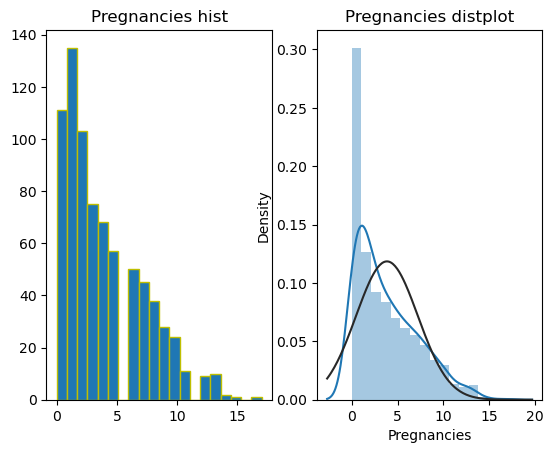

It is a skew distribution => IQR method
lower limit : -6.5
upper limit : 13.5
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


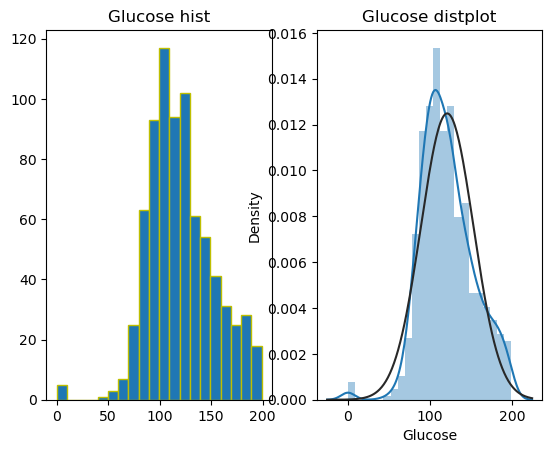

It is a norma distribution=>Mean std method
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
lower limit : 24.976676664591338
upper limit : 216.81238583540866
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


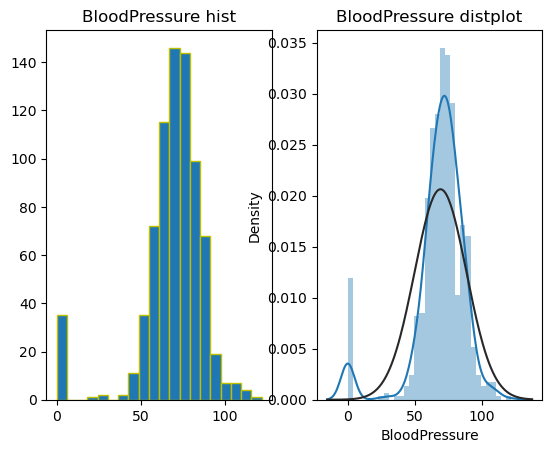

It is a skew distribution => IQR method
lower limit : 35.0
upper limit : 107.0
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


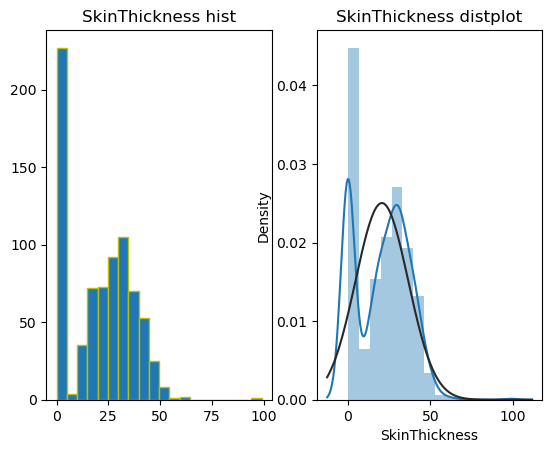

It is a norma distribution=>Mean std method
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
lower limit : -27.3201943698497
upper limit : 68.39311103651636
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


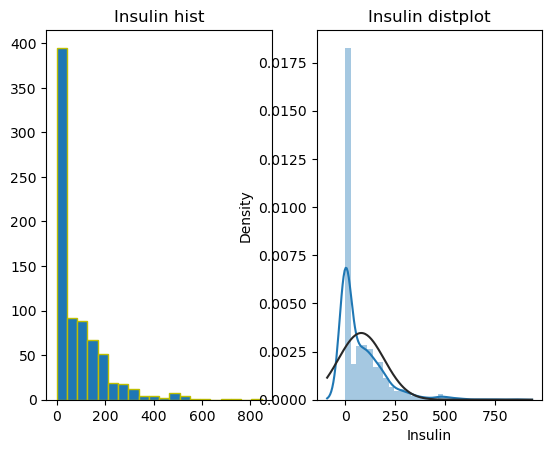

It is a skew distribution => IQR method
lower limit : -190.875
upper limit : 318.125
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


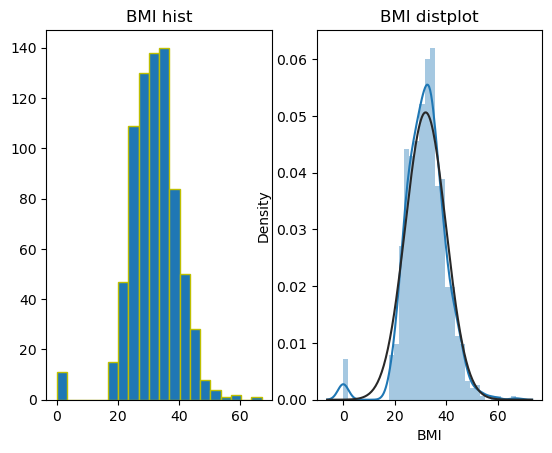

It is a norma distribution=>Mean std method
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
lower limit : 8.340097163873654
upper limit : 55.645059086126295
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


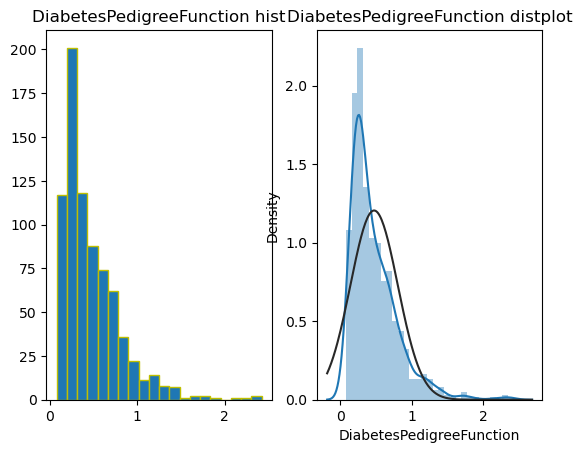

It is a skew distribution => IQR method
lower limit : -0.32999999999999996
upper limit : 1.2
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


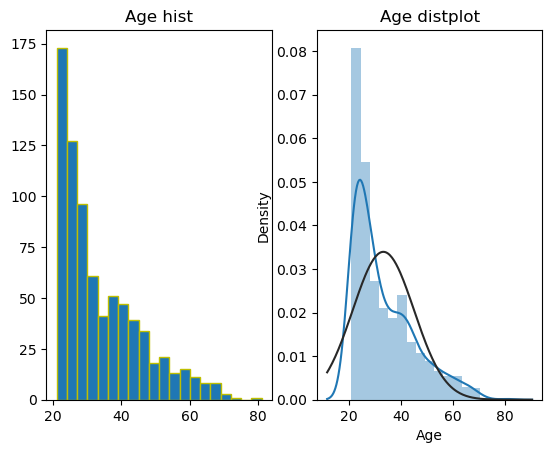

It is a skew distribution => IQR method
lower limit : -1.5
upper limit : 66.5
Rechecking the errors after caping
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766  

In [24]:
Auto_pro(df)